## import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

## read dataset

In [3]:
data = pd.read_csv("dataset.csv")

# take a look at the dataset
data.head()

,Material Code,Material Name,Lignin (%),Cellulose (%),Hemicellulose (%),VS (%),Material Source,Pretreatment,Digestion Temperature (°C),Initial pH,OLR (kg VS/m³/day),HRT (Days),Reactor Type,Biogas Yield (m³/kg VS),Methane (%),Energy Efficiency (%)
0,B001,Banana Peel,12.8,38.0,16.4,92.5,Food Waste,Mechanical,55,7.2,3.3,20,CSTR,0.30,63,56.3
1,B002,Orange Peel,17.9,21.3,21.6,90.7,Agricultural Waste,Thermal,35,6.7,3.7,22,UASB,0.24,52,50.2
2,B003,Orange Peel,24.5,39.5,13.7,90.1,Agricultural Waste,Mechanical,55,7.0,2.2,12,UASB,0.27,60,53.6
3,B004,Wheat Straw,9.5,35.1,18.8,83.4,Agricultural Waste,Mechanical,55,7.0,2.0,22,Batch,0.43,54,67.9
4,B005,Banana Peel,16.8,49.2,13.5,82.3,Agricultural Waste,Chemical,35,6.6,3.8,28,Batch,0.31,50,54.0


## first describe dataset

In [4]:
data.describe()

,Lignin (%),Cellulose (%),Hemicellulose (%),VS (%),Digestion Temperature (°C),Initial pH,OLR (kg VS/m³/day),HRT (Days),Biogas Yield (m³/kg VS),Methane (%),Energy Efficiency (%)
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,15.367200,35.509600,20.372000,85.462800,45.800000,7.002400,2.834000,20.38000,0.351200,56.864000,59.511600
std,5.677692,8.390805,5.760008,5.694556,9.987945,0.306545,0.720054,6.01968,0.083725,4.412185,5.798143
min,5.000000,20.100000,10.000000,75.000000,35.000000,6.500000,1.500000,10.00000,0.200000,50.000000,50.100000
25%,10.625000,28.400000,15.600000,81.100000,35.000000,6.700000,2.200000,15.00000,0.280000,53.000000,54.450000
50%,15.500000,35.800000,20.250000,85.500000,55.000000,7.000000,2.900000,21.00000,0.355000,57.000000,58.650000
75%,19.975000,42.400000,25.500000,90.275000,55.000000,7.300000,3.400000,25.75000,0.420000,60.750000,64.500000
max,25.000000,49.900000,29.900000,94.900000,55.000000,7.500000,4.000000,30.00000,0.500000,65.000000,70.000000


## Elementary analysis of elementary

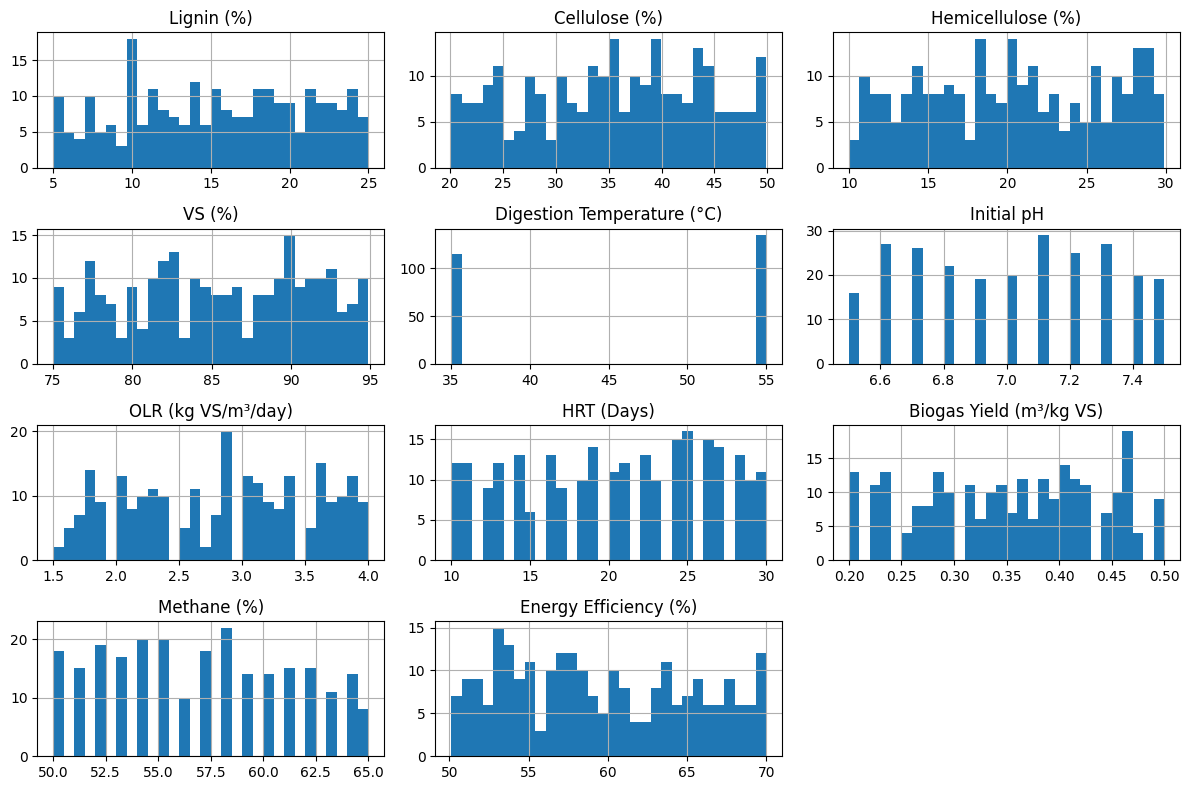

In [6]:
data.hist(figsize=(12, 8), bins=30) 
plt.tight_layout()
plt.show()

## 80/20 train/test split

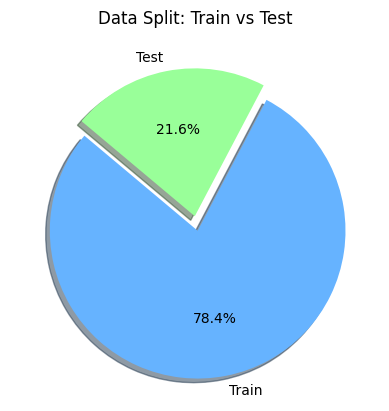

In [10]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

train_size = len(train)
test_size = len(test)

labels = ['Train', 'Test']
sizes = [train_size, test_size]
colors = ['#66b3ff','#99ff99']
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Data Split: Train vs Test')
plt.show()